In [ ]:
!nvidia-smi

Thu Aug  3 20:14:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

from IPython import display

import ultralytics

from ultralytics import YOLO

from IPython.display import display, Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 8.3 MB/s eta 0:00:00


In [ ]:
!yolo task=segment mode=predict model=yolov8l-seg.pt conf=0.5 source='download (1).jpeg'



In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2n3ge3AmwqQPHFla2vfl")
project = rf.workspace("robotica-xftin").project("traffic-cones-4laxg")
dataset = project.version(1).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2bd837fe1ed1b0dcd5c8f0c52497a908ba91a625475b48c5da27bcecc198a83d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.147, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Traffic-Cones-1 in yolov8:: 100%|██████████| 1304/1304 [00:00<00:00, 4412.55it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Traffic-Cones-1/data.yaml epochs=20 imgsz=640


Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Traffic-Cones-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=test.jpeg


Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

image 1/1 /content/test.jpeg: 640x640 6 cones, 36.2ms
Speed: 4.1ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


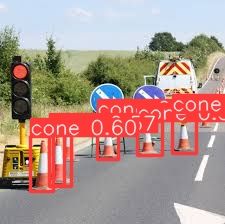

In [ ]:
from IPython.display import Image, display

display(Image('runs/detect/predict/test.jpeg'))


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=video.mp4


Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

video 1/1 (1/2034) /content/video.mp4: 384x640 1 cone, 103.0ms
video 1/1 (2/2034) /content/video.mp4: 384x640 1 cone, 25.8ms
video 1/1 (3/2034) /content/video.mp4: 384x640 1 cone, 25.8ms
video 1/1 (4/2034) /content/video.mp4: 384x640 1 cone, 25.3ms
video 1/1 (5/2034) /content/video.mp4: 384x640 1 cone, 23.6ms
video 1/1 (6/2034) /content/video.mp4: 384x640 1 cone, 23.6ms
video 1/1 (7/2034) /content/video.mp4: 384x640 1 cone, 23.6ms
video 1/1 (8/2034) /content/video.mp4: 384x640 1 cone, 23.6ms
video 1/1 (9/2034) /content/video.mp4: 384x640 1 cone, 23.7ms
video 1/1 (10/2034) /content/video.mp4: 384x640 1 cone, 19.2ms
video 1/1 (11/2034) /content/video.mp4: 384x640 1 cone, 15.3ms
video 1/1 (12/2034) /content/video.mp4: 384x640 1 cone, 15.3ms
video 1/1 (13/2034) /content/video.mp4: 384x640 1 cone, 15.3ms
video 1/1 (14/2034) /content/vid